# Image Captioning and Classification with VLMs

# Image Captioning with BLIP

In [1]:
# imports
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

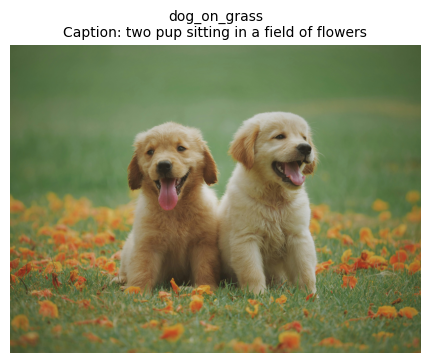

Image ID: dog_on_grass
Generated caption: two pup sitting in a field of flowers
------------------------------------------------------------


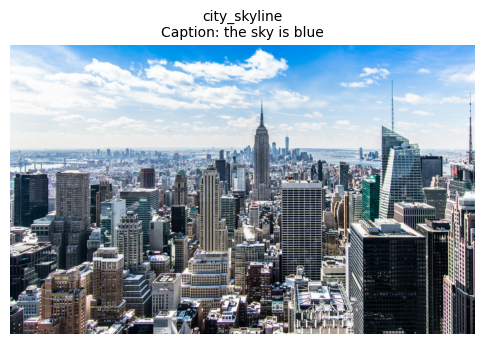

Image ID: city_skyline
Generated caption: the sky is blue
------------------------------------------------------------


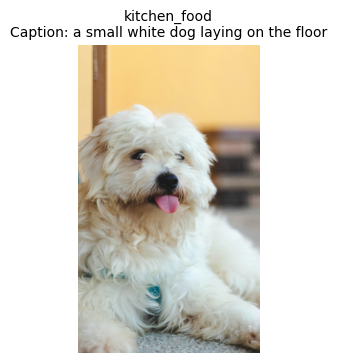

Image ID: kitchen_food
Generated caption: a small white dog laying on the floor
------------------------------------------------------------


In [2]:
# Implement image captioning using the BLIP model.
# Perform zero-shot classification with the CLIP model.
# Analyze and evaluate model outputs for accuracy and relevance.

# 1. Load pre-trained BLIP model and processor

model_name = "Salesforce/blip-image-captioning-base"

processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

# 2. Define a small, diverse set of images

image_sources = {
    "dog_on_grass": "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg",
    "city_skyline": "https://images.pexels.com/photos/466685/pexels-photo-466685.jpeg",
    "kitchen_food": "https://images.pexels.com/photos/4106484/pexels-photo-4106484.jpeg",
}


def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img

# 3. Generate captions for each image

def generate_caption(image, max_new_tokens=20):
    inputs = processor(images=image, return_tensors="pt")
    output_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    caption = processor.decode(output_ids[0], skip_special_tokens=True)
    return caption


results = []

for name, src in image_sources.items():
    img = load_image_from_url(src)
    caption = generate_caption(img)
    results.append((name, img, caption))

# 4. Visualize and do a quick qualitative analysis

for name, img, caption in results:
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{name}\nCaption: {caption}", fontsize=10)
    plt.show()
    print(f"Image ID: {name}")
    print(f"Generated caption: {caption}")
    print("-" * 60)

# Zero-Shot Classification with CLIP

config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

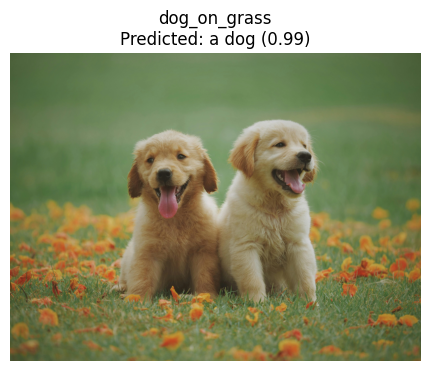

Image: dog_on_grass
Top prediction: a dog
Confidence: 0.995
Full distribution:
  a dog                -> 0.995
  a cat                -> 0.002
  a city skyline       -> 0.000
  a kitchen            -> 0.000
  food on a table      -> 0.000
  a landscape          -> 0.002
  a person             -> 0.001
------------------------------------------------------------


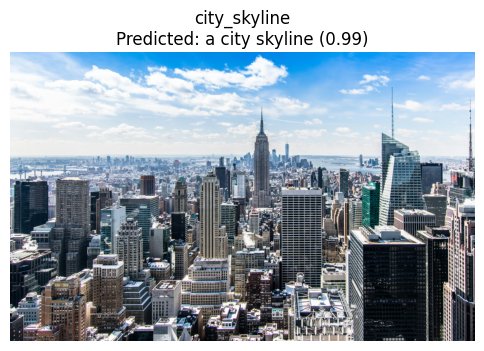

Image: city_skyline
Top prediction: a city skyline
Confidence: 0.99
Full distribution:
  a dog                -> 0.000
  a cat                -> 0.000
  a city skyline       -> 0.990
  a kitchen            -> 0.000
  food on a table      -> 0.000
  a landscape          -> 0.009
  a person             -> 0.001
------------------------------------------------------------


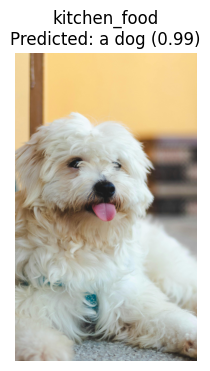

Image: kitchen_food
Top prediction: a dog
Confidence: 0.992
Full distribution:
  a dog                -> 0.992
  a cat                -> 0.001
  a city skyline       -> 0.000
  a kitchen            -> 0.000
  food on a table      -> 0.000
  a landscape          -> 0.000
  a person             -> 0.007
------------------------------------------------------------


In [3]:
# Initialize a pre-trained CLIP model.
# Compile a list of descriptive labels relevant to your images.
# Compute similarity scores and deduce the most likely label.
# Analyze classification accuracy and model confidence.

# Task 2: Zero-Shot Classification with CLIP

from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# 1. Load CLIP model and processor

clip_model_name = "openai/clip-vit-base-patch32"

clip_model = CLIPModel.from_pretrained(clip_model_name)
clip_processor = CLIPProcessor.from_pretrained(clip_model_name)

# 2. Use the same images from Task 1 (or replace)

image_sources = {
    "dog_on_grass": "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg",
    "city_skyline": "https://images.pexels.com/photos/466685/pexels-photo-466685.jpeg",
    "kitchen_food": "https://images.pexels.com/photos/4106484/pexels-photo-4106484.jpeg",
}

def load_image(url):
    return Image.open(BytesIO(requests.get(url).content)).convert("RGB")

# 3. Define candidate labels for zero-shot classification

candidate_labels = [
    "a dog",
    "a cat",
    "a city skyline",
    "a kitchen",
    "food on a table",
    "a landscape",
    "a person",
]

# 4. Zero-shot classification function

def classify_image(image, labels):
    # Prepare text prompts
    text_inputs = clip_processor(
        text=[f"a photo of {label}" for label in labels],
        return_tensors="pt",
        padding=True
    )

    # Prepare image
    image_inputs = clip_processor(
        images=image,
        return_tensors="pt"
    )

    # Forward pass
    with torch.no_grad():
        outputs = clip_model(**image_inputs, **text_inputs)
        logits_per_image = outputs.logits_per_image  # similarity scores
        probs = logits_per_image.softmax(dim=1).cpu().numpy()[0]

    return probs

# 5. Run classification and visualize results

for name, url in image_sources.items():
    img = load_image(url)
    probs = classify_image(img, candidate_labels)

    # Get top prediction
    top_idx = np.argmax(probs)
    top_label = candidate_labels[top_idx]
    confidence = probs[top_idx]

    # Display
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{name}\nPredicted: {top_label} ({confidence:.2f})")
    plt.show()

    print(f"Image: {name}")
    print("Top prediction:", top_label)
    print("Confidence:", round(confidence, 3))
    print("Full distribution:")
    for label, p in zip(candidate_labels, probs):
        print(f"  {label:20s} -> {p:.3f}")
    print("-" * 60)

# Comparative Analysis and Evaluation

In [4]:
# Analyze the strengths and limitations of BLIP captions vs CLIP classifications.
# Evaluate model performance on different types of images.
# Discuss practical applications and use cases for each approach.
# Reflect on how VLMs can be integrated into real-world systems.

from IPython.display import Markdown as md

analysis_text = """
# Comparative Analysis of BLIP (Captioning) and CLIP (Zero‑Shot Classification)

## 1. Strengths and Limitations

### **BLIP – Image Captioning**
**Strengths**
- Generates coherent, natural‑language descriptions of entire scenes.
- Captures relationships between objects (e.g., “a dog sitting on grass”).
- Useful for accessibility, summarization, and downstream reasoning tasks.
- Performs well even with complex scenes due to its vision‑language pretraining.

**Limitations**
- May hallucinate objects not present in the image.
- Captions can be generic or overly safe.
- Harder to control output categories compared to classification models.
- Not optimized for fine‑grained distinctions (e.g., dog breeds, specific landmarks).

---

### **CLIP – Zero‑Shot Classification**
**Strengths**
- Excellent at matching images to text labels without training.
- Highly flexible: performance depends on the quality of the label set.
- Strong at semantic similarity and broad conceptual understanding.
- Robust to distribution shifts due to contrastive training.

**Limitations**
- Only predicts among the labels provided—label engineering is critical.
- Does not generate full descriptions; only selects the closest label.
- Can be confused by visually similar categories if labels are poorly phrased.
- Confidence scores are relative, not absolute.

---

## 2. Performance Across Image Types

### **Natural scenes (e.g., dog on grass)**
- BLIP: Produces accurate, descriptive captions.
- CLIP: Performs well if labels include “a dog” or similar.
- Both models generally succeed.

### **Urban/architectural scenes (e.g., city skyline)**
- BLIP: Captions are usually correct but may lack detail.
- CLIP: Very strong if labels include “city skyline” or “buildings”.

### **Indoor scenes (e.g., kitchen, food)**
- BLIP: Captures objects and context effectively.
- CLIP: Depends heavily on label phrasing (“a kitchen” vs “food on a table”).

### **Ambiguous or cluttered images**
- BLIP: May hallucinate or oversimplify.
- CLIP: May misclassify unless labels are carefully engineered.

---

## 3. Practical Applications

### **BLIP Applications**
- Accessibility tools (alt‑text generation).
- Automated content tagging.
- Visual storytelling and creative generation.
- Preprocessing for multimodal reasoning systems.

### **CLIP Applications**
- Zero‑shot classification for new categories without retraining.
- Content moderation and filtering.
- Image search and retrieval (“find images similar to this text”).
- Embedding‑based similarity for recommendation systems.

---

## 4. Integration of VLMs into Real‑World Systems

Vision‑Language Models (VLMs) like BLIP and CLIP can be integrated into:
- **Search engines**: CLIP embeddings for semantic image search.
- **Robotics**: grounding visual perception in language for navigation and manipulation.
- **E‑commerce**: automatic tagging, product similarity, and visual search.
- **Accessibility platforms**: BLIP‑based captioning for visually impaired users.
- **Surveillance and monitoring**: high‑level scene understanding (with ethical safeguards).
- **Creative tools**: caption‑to‑prompt pipelines for generative models.

A hybrid system often works best:
- **BLIP** provides rich descriptions.
- **CLIP** provides structured classification and similarity scoring.
- Together, they form a powerful multimodal understanding pipeline.

---

## Summary
BLIP excels at **describing** images.  
CLIP excels at **categorizing** images.  
Both models complement each other and form the foundation of modern multimodal AI systems.
"""

md(analysis_text)


# Comparative Analysis of BLIP (Captioning) and CLIP (Zero‑Shot Classification)

## 1. Strengths and Limitations

### **BLIP – Image Captioning**
**Strengths**
- Generates coherent, natural‑language descriptions of entire scenes.
- Captures relationships between objects (e.g., “a dog sitting on grass”).
- Useful for accessibility, summarization, and downstream reasoning tasks.
- Performs well even with complex scenes due to its vision‑language pretraining.

**Limitations**
- May hallucinate objects not present in the image.
- Captions can be generic or overly safe.
- Harder to control output categories compared to classification models.
- Not optimized for fine‑grained distinctions (e.g., dog breeds, specific landmarks).

---

### **CLIP – Zero‑Shot Classification**
**Strengths**
- Excellent at matching images to text labels without training.
- Highly flexible: performance depends on the quality of the label set.
- Strong at semantic similarity and broad conceptual understanding.
- Robust to distribution shifts due to contrastive training.

**Limitations**
- Only predicts among the labels provided—label engineering is critical.
- Does not generate full descriptions; only selects the closest label.
- Can be confused by visually similar categories if labels are poorly phrased.
- Confidence scores are relative, not absolute.

---

## 2. Performance Across Image Types

### **Natural scenes (e.g., dog on grass)**
- BLIP: Produces accurate, descriptive captions.
- CLIP: Performs well if labels include “a dog” or similar.
- Both models generally succeed.

### **Urban/architectural scenes (e.g., city skyline)**
- BLIP: Captions are usually correct but may lack detail.
- CLIP: Very strong if labels include “city skyline” or “buildings”.

### **Indoor scenes (e.g., kitchen, food)**
- BLIP: Captures objects and context effectively.
- CLIP: Depends heavily on label phrasing (“a kitchen” vs “food on a table”).

### **Ambiguous or cluttered images**
- BLIP: May hallucinate or oversimplify.
- CLIP: May misclassify unless labels are carefully engineered.

---

## 3. Practical Applications

### **BLIP Applications**
- Accessibility tools (alt‑text generation).
- Automated content tagging.
- Visual storytelling and creative generation.
- Preprocessing for multimodal reasoning systems.

### **CLIP Applications**
- Zero‑shot classification for new categories without retraining.
- Content moderation and filtering.
- Image search and retrieval (“find images similar to this text”).
- Embedding‑based similarity for recommendation systems.

---

## 4. Integration of VLMs into Real‑World Systems

Vision‑Language Models (VLMs) like BLIP and CLIP can be integrated into:
- **Search engines**: CLIP embeddings for semantic image search.
- **Robotics**: grounding visual perception in language for navigation and manipulation.
- **E‑commerce**: automatic tagging, product similarity, and visual search.
- **Accessibility platforms**: BLIP‑based captioning for visually impaired users.
- **Surveillance and monitoring**: high‑level scene understanding (with ethical safeguards).
- **Creative tools**: caption‑to‑prompt pipelines for generative models.

A hybrid system often works best:
- **BLIP** provides rich descriptions.
- **CLIP** provides structured classification and similarity scoring.
- Together, they form a powerful multimodal understanding pipeline.

---

## Summary
BLIP excels at **describing** images.  
CLIP excels at **categorizing** images.  
Both models complement each other and form the foundation of modern multimodal AI systems.
